In [2]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import re
# import pylab

In [3]:
def loadData(str):
    fr = open(str)
    sArr = [line.strip().split("\t") for line in fr.readlines()]
    sArr = sArr[1:]
    # a = sArr[0][1]
    # print(a.split(','))
    # a = [line for line in sArr]
    datArr = []
    for line in sArr:
        dataRow = []
        for s in line[1].split(','):
            dataRow.append(float(s))
        datArr.append(dataRow)
    # print(datArr)
    # datArr = [[float(s) for s in line[1].split(',')] for line in sArr]
    # datArr = [[float(s) for s in line[1][1:-1].split(", ")] for line in sArr]

    matA = np.mat(datArr)
    print(matA.shape)
    nameArr = [line[0] for line in sArr]
    return matA, nameArr

In [4]:
def pca(inputM, k):
    covMat = cov(inputM, rowvar=0)        
    eigVals,eigVects = linalg.eig(covMat) 
    sorted_val = argsort(eigVals)
    index = sorted_val[:-(k+1):-1]
    Vects = eigVects[:,index]
    outputM = inputM * Vects
    return outputM

In [5]:
def findIndex(tripleIndex):
    # tripleIndex = [0, 3, 5]
    with open('HarryPotter/HP_train.txt', 'r') as f:
        lines = f.readlines()
        triples = [lines[i].strip().split("\t") for i in tripleIndex]
        print(triples)
        h_t = [t[0] for t in triples] + [t[2] for t in triples]
        r = [t[1] for t in triples]

    with open("HarryPotter/entityEmbedding.txt", 'r') as f:
        dataE = [line.strip().split("\t") for line in f.readlines()]
        dataE = dataE[1:]
        dataE = [i[0] for i in dataE]
        print(len(dataE))
        indexE = [dataE.index(i) for i in h_t]
    #     for i in h_t:
    #         indexE.append()

    with open("HarryPotter/relationEmbedding.txt", 'r') as f:
        dataR = [line.strip().split("\t") for line in f.readlines()]
        dataR = dataR[1:]
        dataR = [i[0] for i in dataR]
        indexR = [dataR.index(i) for i in r]
        indexR = [i + len(dataE) for i in indexR]

    return indexE, indexR

In [6]:
def plotV(data, labels, indexE, indexR, fig_name):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    print("aaa")
    font = { 'fontname':'Tahoma', 'fontsize':10, 'verticalalignment': 'top', 'horizontalalignment':'center' }
    data= array(data)
#     print(data[:, 0])
#     ax.scatter(data[:, 0].tolist(), data[:, 1].tolist(), marker ='o')
    for i in indexE:
        x = data[:, 0][i]
        y = data[:, 1][i]
        print(x,y)
        ax.scatter(x, y, marker ='o')
    ax.set_xlim(-0.8,0.8)
    ax.set_ylim(-0.8,0.8)

    for i in indexE:
        x = data[:, 0][i]
        y = data[:, 1][i]
        ax.annotate(labels[i], xy = (x, y), xytext = None, ha = 'right', va = 'bottom', **font)
    
    for i in indexR:
        x = data[:, 0][i]
        y = data[:, 1][i]
        print(x,y)
#         ax.scatter(x, y, marker ='o')
        ax.quiver(0,0,x,y,angles='xy', scale_units='xy', scale=1, width = 0.005)
        ax.annotate(labels[i], xy = (x, y), xytext = None, ha = 'right', va = 'bottom', **font)
    
#     for label, x, y in zip(labels, data[:, 0][:5], data[:, 1][:5]):
#         # i += 1
#         # s = random.uniform(0,100)
#         # if i<14951:
#         #     if s > 99:
#         #         continue
#         # else:
#         #     if s > 99:
#         #         continue
#         ax.annotate(label, xy = (x, y), xytext = None, ha = 'right', va = 'bottom', **font)


    plt.title('TransE pca2dim')
    plt.xlabel('X')
    plt.ylabel('Y')
    print("ddd")
    plt.savefig(fig_name,dpi = 1000)
    plt.show()

In [7]:
def plotVector(data, labels, indexE, indexR, fig_name):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    font = { 'fontname':'Tahoma', 'fontsize':10, 'verticalalignment': 'top', 'horizontalalignment':'center' }
    data= array(data)
    clist=['r','g','b','c','m','y','k','darkorange','lightgreen','plum','tan','khaki','pink','skyblue','lawngreen','salmon','grey','darkviolet','turquoise']

#     print(data[:, 0])
#     ax.scatter(data[:, 0].tolist(), data[:, 1].tolist(), marker ='o')
    for i in range(len(indexR)):
        n = len(indexR)
        cindex = i%len(clist)
        print(cindex)
        x1 = data[:, 0][indexE[i]]
        y1 = data[:, 1][indexE[i]]
        x2 = data[:, 0][indexE[i+n]]
        y2 = data[:, 1][indexE[i+n]]
        x = [x1] + [x2]
        y = [y1] + [y2]
        x_r = data[:, 0][indexR[i]]
        y_r = data[:, 1][indexR[i]]
        
        # enity
        ax.scatter(x, y, marker ='o',color = clist[cindex])
        
        #relation
        ax.quiver(x1,y1,x_r,y_r,angles='xy', scale_units='xy', scale=1, width = 0.005,color = clist[cindex])
        
        
        # labels
#         ax.annotate("h {}".format(i), xy = (x1, y1), xytext = None, ha = 'right', va = 'bottom', **font)
#         ax.annotate("t {}".format(i), xy = (x2, y2), xytext = None, ha = 'right', va = 'bottom', **font)
#         ax.annotate("r {}".format(i), xy = (x1+x_r, y1+y_r), xytext = None, ha = 'right', va = 'bottom', **font)
        ax.annotate(labels[indexE[i]], xy = (x1, y1), xytext = None, ha = 'right', va = 'bottom', **font)
        ax.annotate(labels[indexE[i+n]], xy = (x2, y2), xytext = None, ha = 'right', va = 'bottom', **font)
        ax.annotate(labels[indexR[i]], xy = (x1+x_r, y1+y_r), xytext = None, ha = 'right', va = 'bottom', **font)
        
        
#     for label, x, y in zip(labels, data[:, 0][:5], data[:, 1][:5]):
#         # i += 1
#         # s = random.uniform(0,100)
#         # if i<14951:
#         #     if s > 99:
#         #         continue
#         # else:
#         #     if s > 99:
#         #         continue
#         ax.annotate(label, xy = (x, y), xytext = None, ha = 'right', va = 'bottom', **font)

#     ax.set_xlim(-0.8,0.8)
#     ax.set_ylim(-0.8,0.8)

    plt.title('TransE pca2dim')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.savefig(fig_name,dpi = 100)
    plt.show()

In [8]:
def label_to_name(label_list):  
    name_map = {}
    with open('map.txt', "r", encoding="utf-8") as fp:
        s = fp.readlines()
        for line in s:
            token = line.strip().split("\t")
            name_map[token[0]] = token[1]
    for i in range(len(label_list)):
        if label_list[i] in name_map:
            label_list[i] = name_map[label_list[i]]
    return label_list

In [9]:
def label_to_relation_name(nameRelation):
    for i,s in enumerate(nameRelation):
        prefix = re.search('/(.*)/',s)
        result = s[prefix.span()[1]:]
        nameRelation[i] = result
#         print(s[prefix.span()[1]:])
    return nameRelation

# Mining data features

k-means

In [55]:
# k-means clustering
from numpy import unique
from numpy import where


from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

from matplotlib import pyplot as plt

from sklearn.metrics import davies_bouldin_score
from sklearn.mixture import GaussianMixture

In [11]:
# data
dirEntity = "entityEmbedding_99.txt"
dirRelation = "relationEmbedding_99.txt"
matEntity, nameEntity = loadData(dirEntity)
matRelation, nameRelation = loadData(dirRelation)

arrayEntity = array(pca(matEntity,2))
arrayRelation = array(pca(matRelation,2))

nameList = label_to_name(nameEntity)

(14951, 100)
(1345, 100)


In [25]:
def kmeans(input_array, n):
    a = array(input_array)
    # define the model
    model = KMeans(n_clusters=n)
    # fit the model
    model.fit(a)
    # assign a cluster to each example
    yhat = model.predict(a)
    # retrieve unique clusters
    clusters = unique(yhat)
    # create scatter plot for samples from each cluster
    for cluster in clusters:
        # get row indexes for samples with this cluster
        row_ix = where(yhat == cluster)
        # create scatter of these samples
        pyplot.scatter(a[row_ix, 0], a[row_ix, 1])
    #     print(a[row_ix, 0], a[row_ix, 1])
    # show the plot
    pyplot.show()
    return yhat

In [30]:
def gaussian(input_array, n):
    a = array(input_array)
    # define the model
    model = GaussianMixture(n_components=n, random_state=0)
    # fit the model
    model.fit(a)
    # assign a cluster to each example
    yhat = model.predict(a)
    # retrieve unique clusters
    clusters = unique(yhat)
    # create scatter plot for samples from each cluster
    for cluster in clusters:
        # get row indexes for samples with this cluster
        row_ix = where(yhat == cluster)
        # create scatter of these samples
        pyplot.scatter(a[row_ix, 0], a[row_ix, 1])
    #     print(a[row_ix, 0], a[row_ix, 1])
    # show the plot
    pyplot.show()
    return yhat

In [36]:
def mean_shift(input_array):
    # define dataset
    a = array(input_array)
    # define the model
    model = MeanShift()
    # fit model and predict clusters
    yhat = model.fit_predict(a)
    # retrieve unique clusters
    clusters = unique(yhat)
    # create scatter plot for samples from each cluster
    for cluster in clusters:
        # get row indexes for samples with this cluster
        row_ix = where(yhat == cluster)
        # create scatter of these samples
        pyplot.scatter(a[row_ix, 0], a[row_ix, 1])
    # show the plot
    pyplot.show()
    return yhat

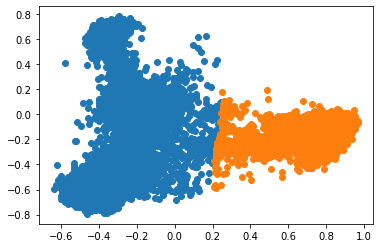

In [40]:
kmeans_out = kmeans(arrayEntity,2)

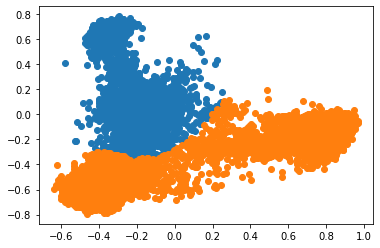

In [39]:
gaussian_out = gaussian(arrayEntity,2)

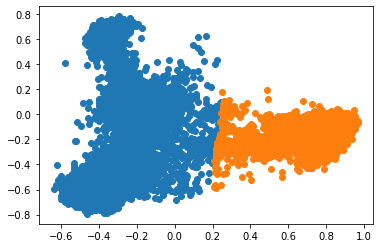

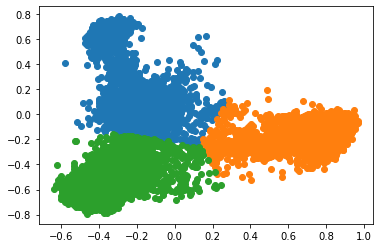

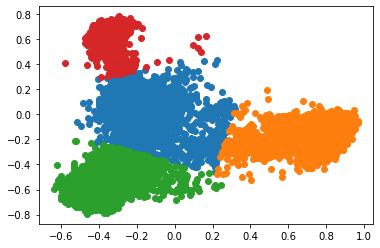

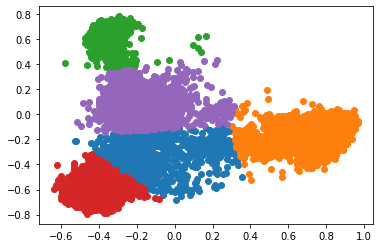

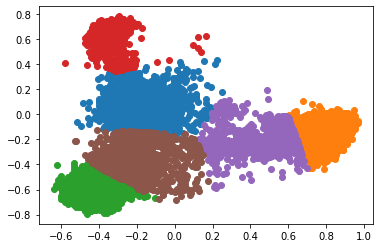

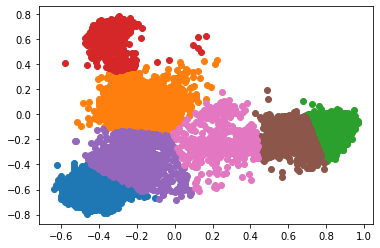

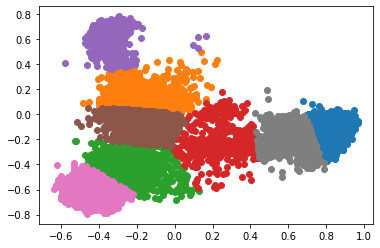

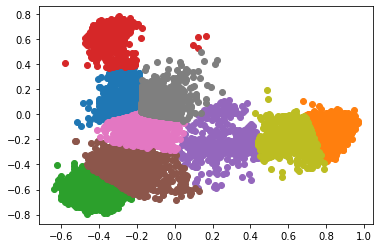

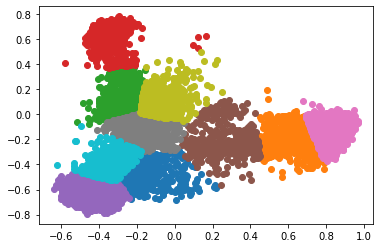

In [73]:
results = []
for n in range(2,11):
    kmeans_out = kmeans(arrayEntity,n)
    result = davies_bouldin_score(arrayEntity, kmeans_out)
    results.append(result)

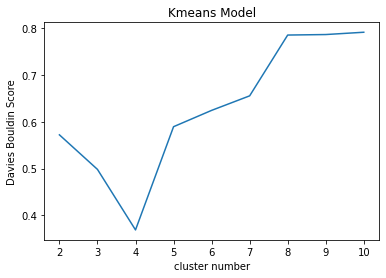

In [74]:
plt.xlabel('cluster number')
plt.ylabel('Davies Bouldin Score')
plt.title('Kmeans Model')
plt.plot(range(2,11), results)
plt.savefig('cluster/kmenasDB.png')

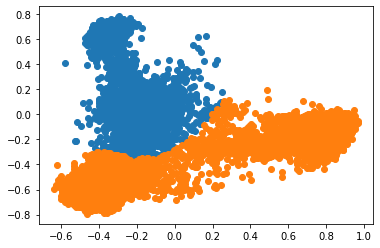

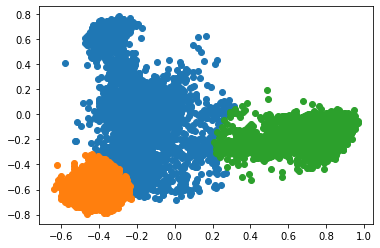

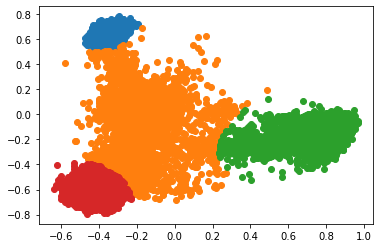

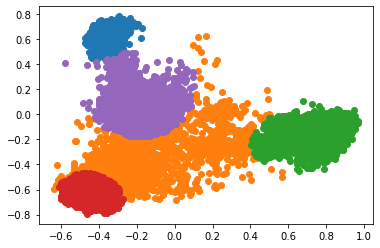

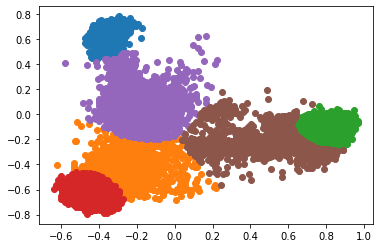

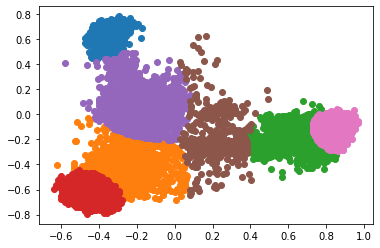

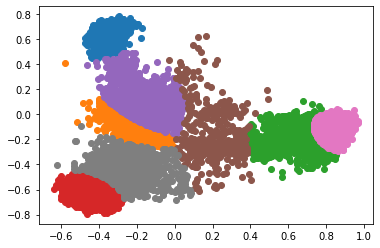

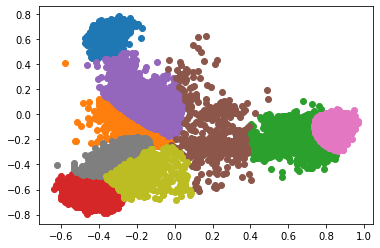

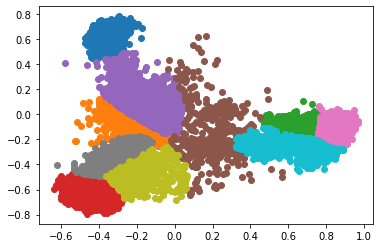

In [71]:
results = []
for n in range(2,11):
    gaussian_out = gaussian(arrayEntity,n)
    result = davies_bouldin_score(arrayEntity, gaussian_out)
    results.append(result)

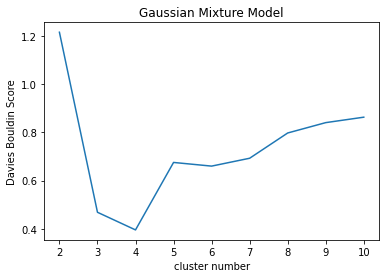

In [72]:
plt.xlabel('cluster number')
plt.ylabel('Davies Bouldin Score')
plt.title('Gaussian Mixture Model')
plt.plot(range(2,11), results)
plt.savefig('cluster/gaussionDB.png')

In [ ]:
pyplot.plot(range(2,11),results)

In [ ]:
# ou = mean_shift(arrayEntity)

In [ ]:
davies_bouldin_score(arrayEntity, kmeans_out)

In [ ]:
davies_bouldin_score(arrayEntity, gaussian_out)

In [ ]:
davies_bouldin_score(arrayEntity, ou)

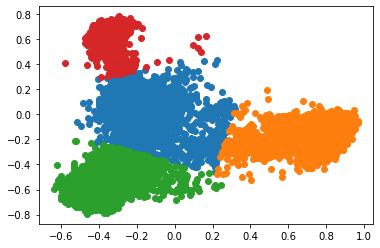

In [86]:
a = array(arrayEntity)
# define the model
# model = GaussianMixture(n_components=4, random_state=0)
model = KMeans(n_clusters=4)
# fit the model
model.fit(a)
# assign a cluster to each example
yhat = model.predict(a)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(a[row_ix, 0], a[row_ix, 1])
#     print(a[row_ix, 0], a[row_ix, 1])
# show the plot

# plt.title('Gaussian Mixture Model, n = 4')
# plt.savefig('cluster/gaussian4.png')
plt.show()

In [87]:
davies_bouldin_score(arrayEntity, yhat)

0.3687800966973048

mean-shift

In [ ]:
# from sklearn.cluster import MeanShift
# # define dataset
# a = array(arrayEntity)
# # define the model
# model = MeanShift()
# # fit model and predict clusters
# yhat = model.fit_predict(a)
# # retrieve unique clusters
# clusters = unique(yhat)
# # create scatter plot for samples from each cluster
# for cluster in clusters:
#     # get row indexes for samples with this cluster
#     row_ix = where(yhat == cluster)
#     # create scatter of these samples
#     pyplot.scatter(a[row_ix, 0], a[row_ix, 1])
# # show the plot
# pyplot.show()

T-SNE Entity

In [88]:
from sklearn.manifold import TSNE
arrayEntity = array(matEntity)
Entity_embedded = TSNE(n_components=2, init='random').fit_transform(arrayEntity)

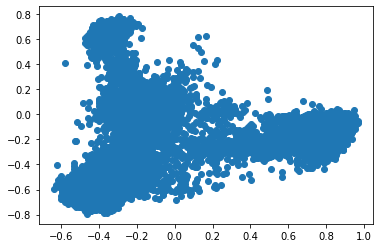

In [93]:
PCAEntity = array(pca(matEntity,2))
pyplot.scatter(PCAEntity[:,0], PCAEntity[:,1])
plt.savefig('cluster/PCA.png')
pyplot.show()

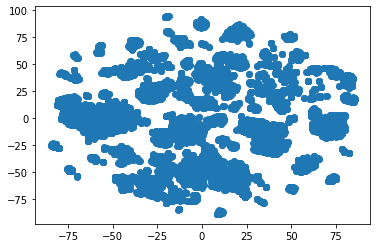

In [90]:
pyplot.scatter(Entity_embedded[:,0], Entity_embedded[:,1])
plt.savefig('cluster/TSNE.png')
pyplot.show()

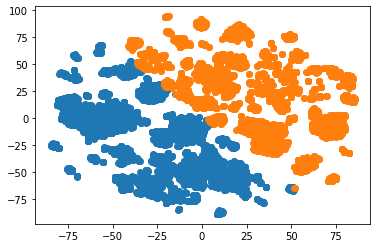

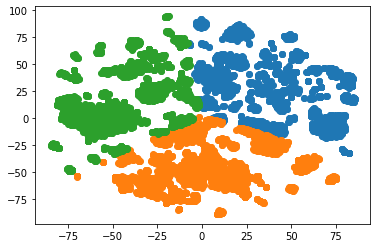

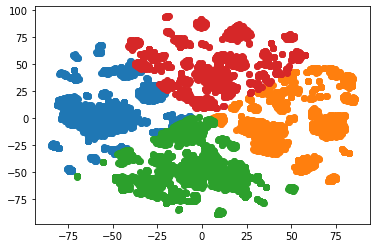

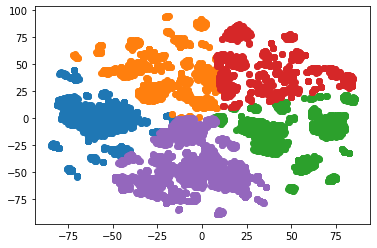

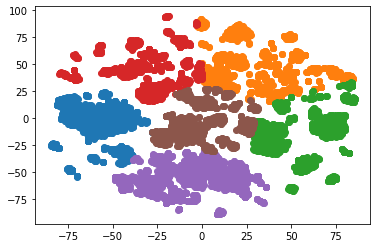

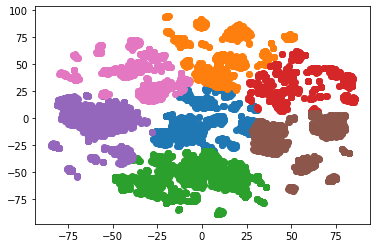

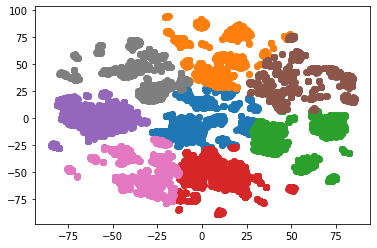

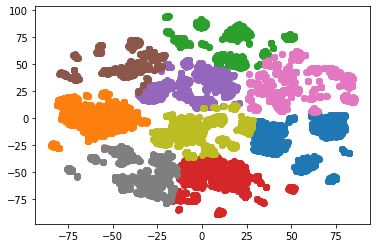

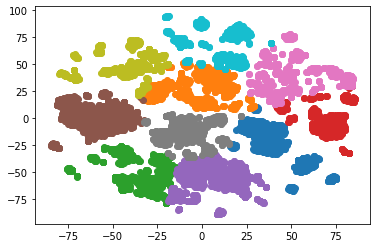

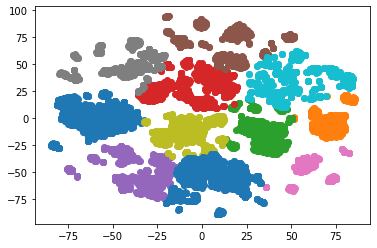

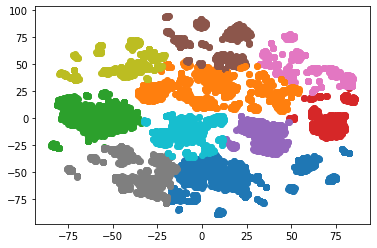

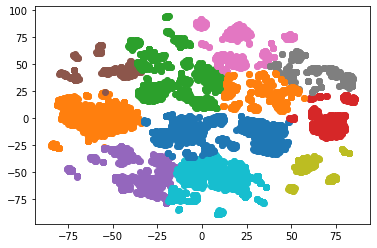

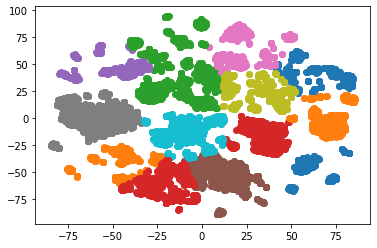

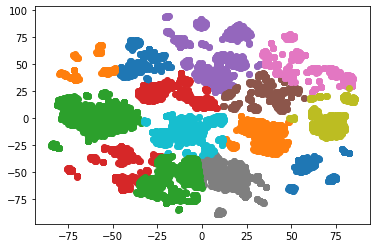

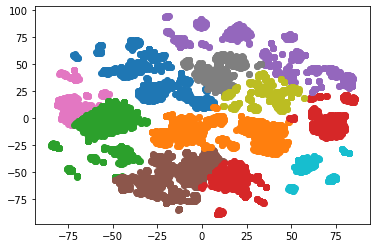

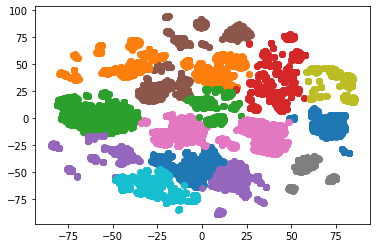

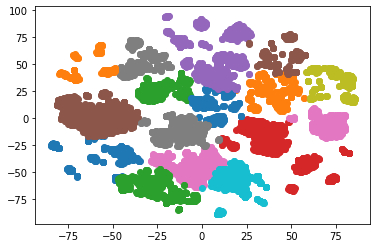

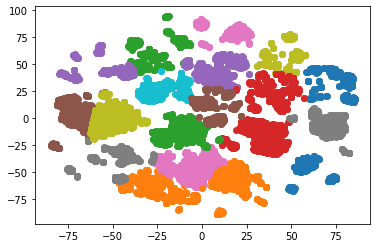

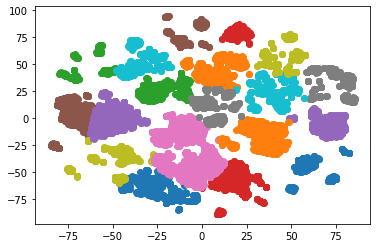

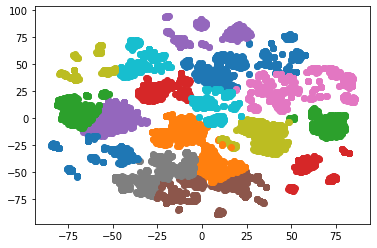

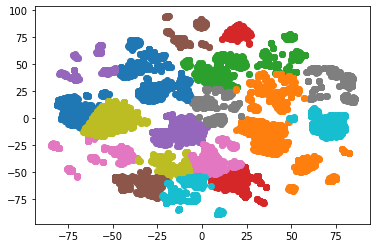

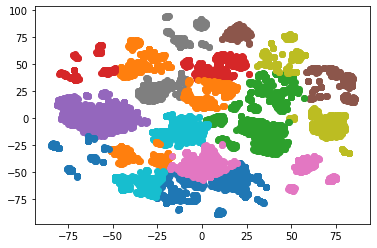

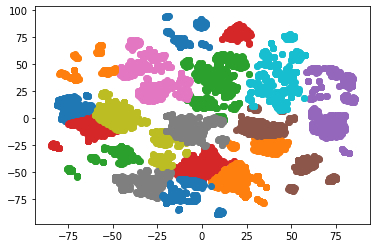

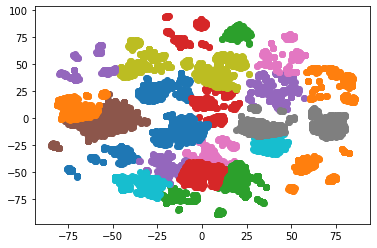

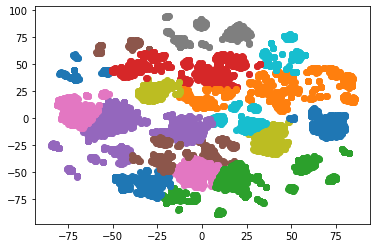

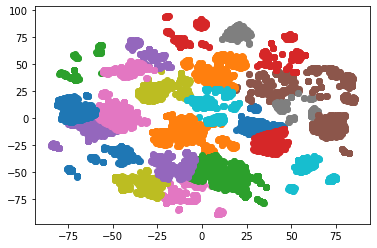

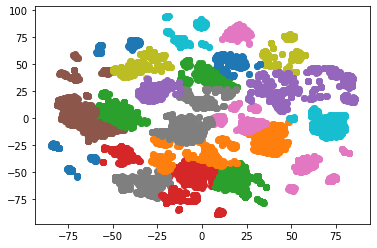

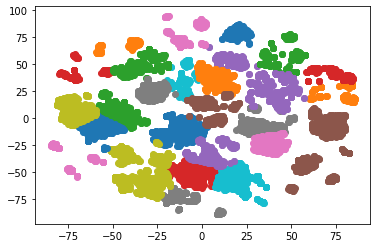

In [101]:
results = []
for n in range(2,30):
    kmeans_out = kmeans(Entity_embedded,n)
    result = davies_bouldin_score(Entity_embedded, kmeans_out)
    results.append(result)

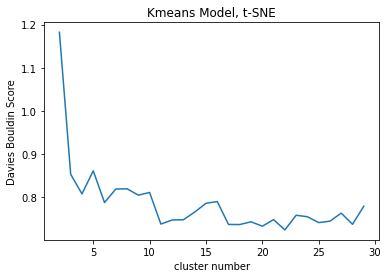

In [102]:
plt.xlabel('cluster number')
plt.ylabel('Davies Bouldin Score')
plt.title('Kmeans Model, t-SNE')
plt.plot(range(2,30), results)
plt.savefig('cluster/kmenasDB_TSNE.png')

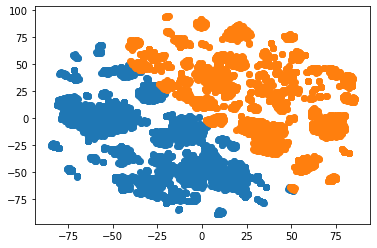

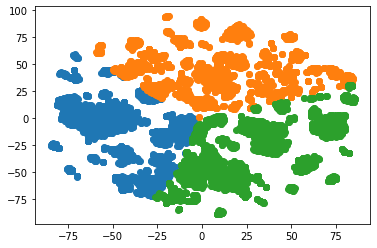

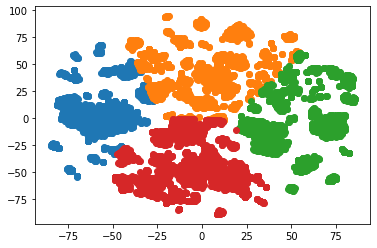

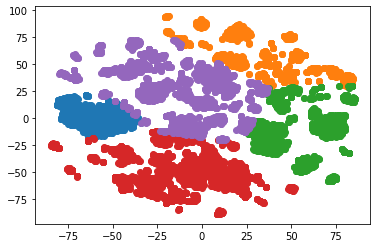

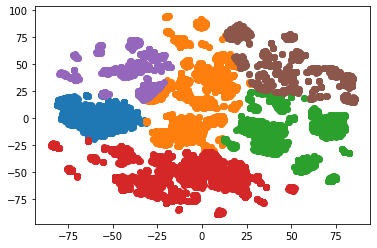

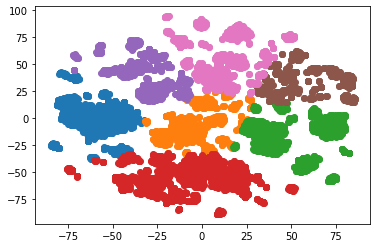

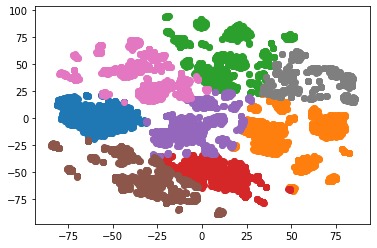

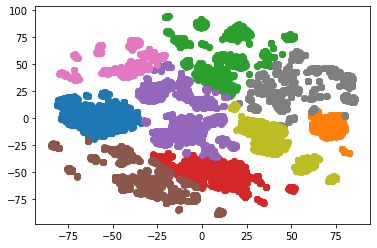

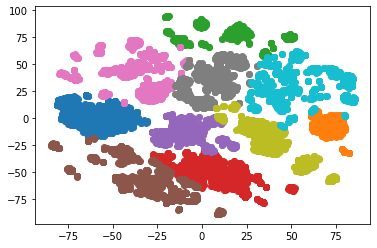

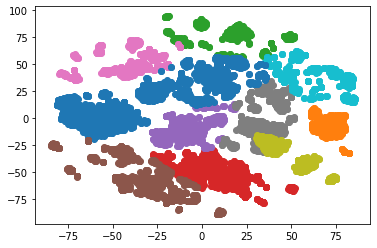

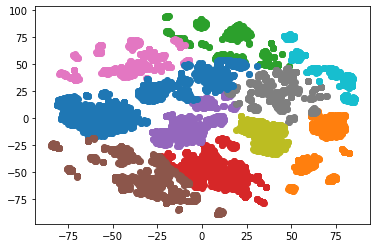

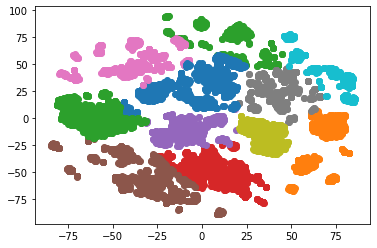

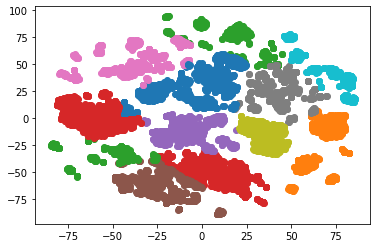

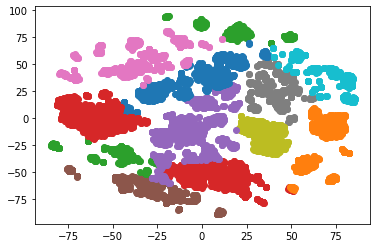

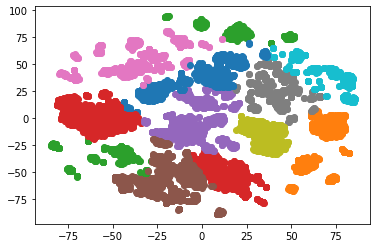

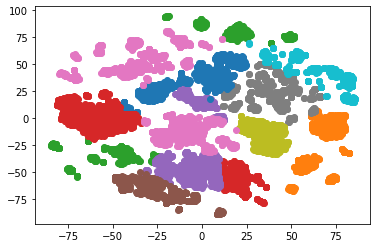

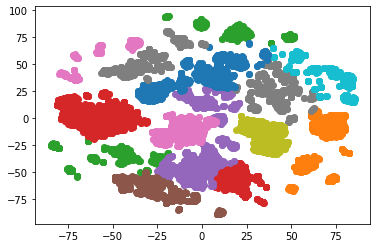

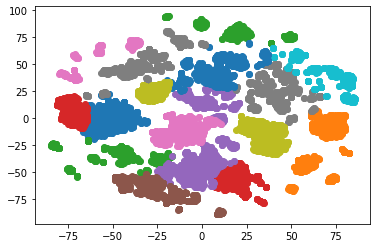

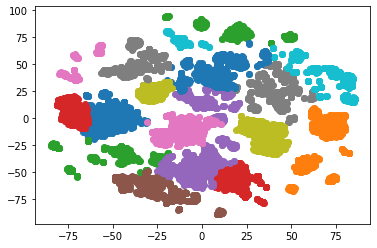

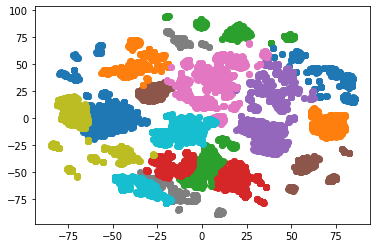

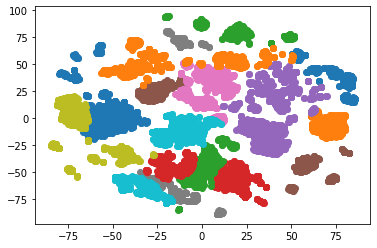

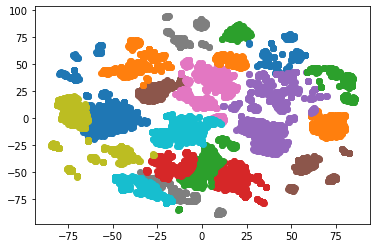

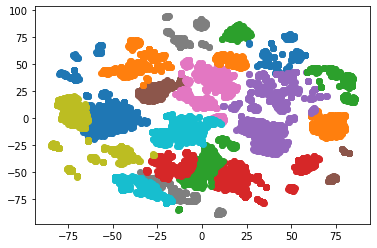

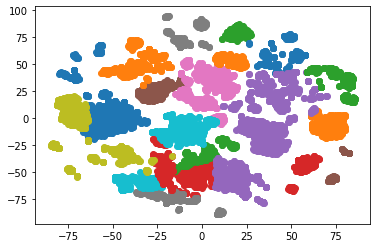

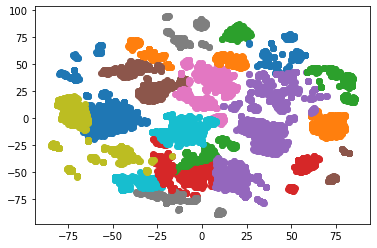

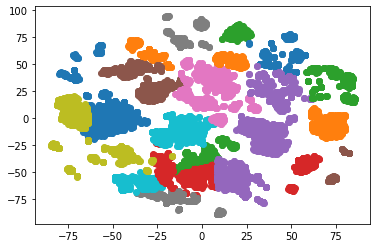

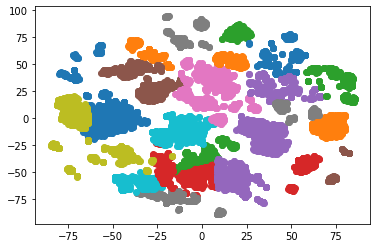

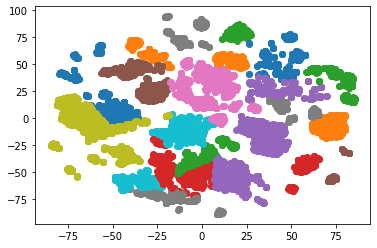

In [98]:
results = []
for n in range(2,30):
    kmeans_out = gaussian(Entity_embedded,n)
    result = davies_bouldin_score(Entity_embedded, kmeans_out)
    results.append(result)

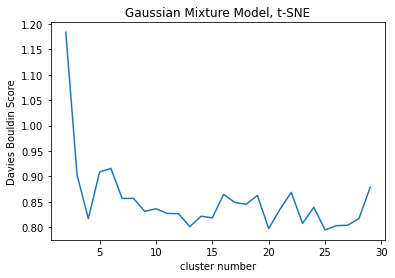

In [100]:
plt.xlabel('cluster number')
plt.ylabel('Davies Bouldin Score')
plt.title('Gaussian Mixture Model, t-SNE')
plt.plot(range(2,30), results)
plt.savefig('cluster/gaussianDB_TSNE.png')

In [118]:
results[18:27]

[0.7320117116325255,
 0.7473011455866416,
 0.7233730785518474,
 0.7574718539622605,
 0.7539514486672245,
 0.7403709315169332,
 0.7436572921043851,
 0.762331706432204,
 0.7364559739264226]

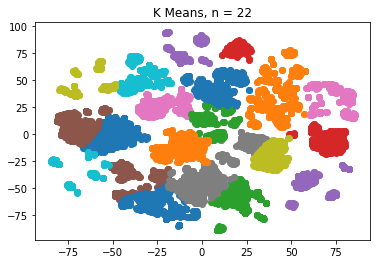

In [122]:
a = array(Entity_embedded)
# define the model
# model = GaussianMixture(n_components=25, random_state=0)
model = KMeans(n_clusters=22)
# fit the model
model.fit(a)
# assign a cluster to each example
yhat = model.predict(a)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(a[row_ix, 0], a[row_ix, 1])
#     print(a[row_ix, 0], a[row_ix, 1])
# show the plot

plt.title('K Means, n = 22')
# plt.title('Gaussian Mixture Model, n = 22')
plt.savefig('cluster/kmeans22.png')
plt.show()

In [120]:
davies_bouldin_score(Entity_embedded, yhat)

0.7948678029311784

T-SNE relation

In [ ]:
from sklearn.manifold import TSNE
arrayRelation = array(arrayRelation)
Relation_embedded = TSNE(n_components=2, init='random').fit_transform(arrayRelation)